# Classifying iris flower species

## Importing dependencies

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Data Collection and Preprocessing

In [43]:
data_set = pd.read_csv('iris.csv')

In [44]:
# check for missing values
print(data_set.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


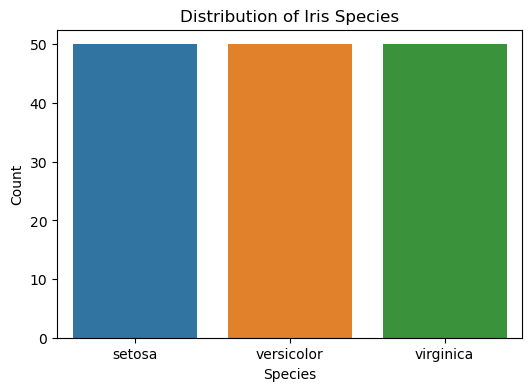

In [46]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x=data_set['species'])
plt.xlabel("Species")
plt.ylabel("Count")
plt.title("Distribution of Iris Species")
plt.show()


## Train test split data

In [47]:
from sklearn.model_selection import train_test_split

x = data_set.drop(columns=['species'])
y = data_set['species']

x_train,x_test,y_train,y_test  = train_test_split(x, y, test_size=0.2, random_state=1)

# Model Training

In [48]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
model.fit(x_train,y_train)



DecisionTreeClassifier(max_depth=3, random_state=42)

## Model Evaluation

In [49]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Function to check accuracy and other metrics
def check_accuracy(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)*100
    print(f"\nModel Accuracy: {accuracy:.2f}%")
    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    return accuracy


Model Accuracy: 96.67%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30


Confusion Matrix:
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


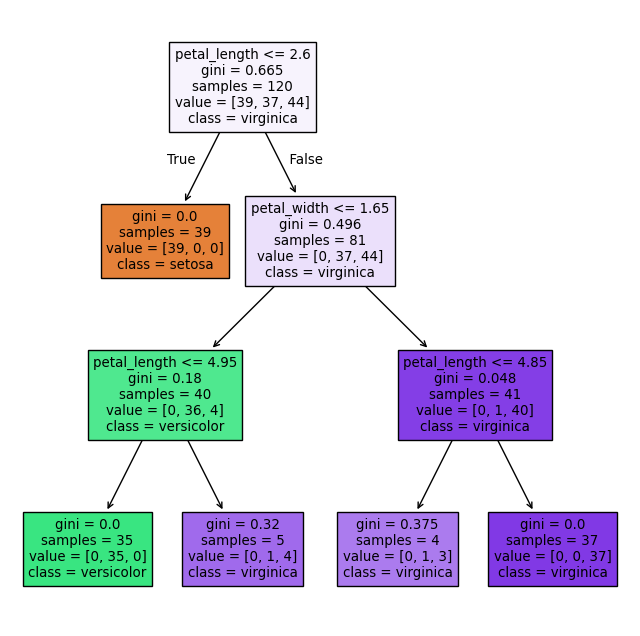

In [50]:
# Call the accuracy function
check_accuracy(model,x_test, y_test)

# Visualize the Decision Tree
plt.figure(figsize=(8, 8))
plot_tree(model, filled=True, feature_names=x.columns, class_names=model.classes_)
plt.show()